In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# R vs Python Results 

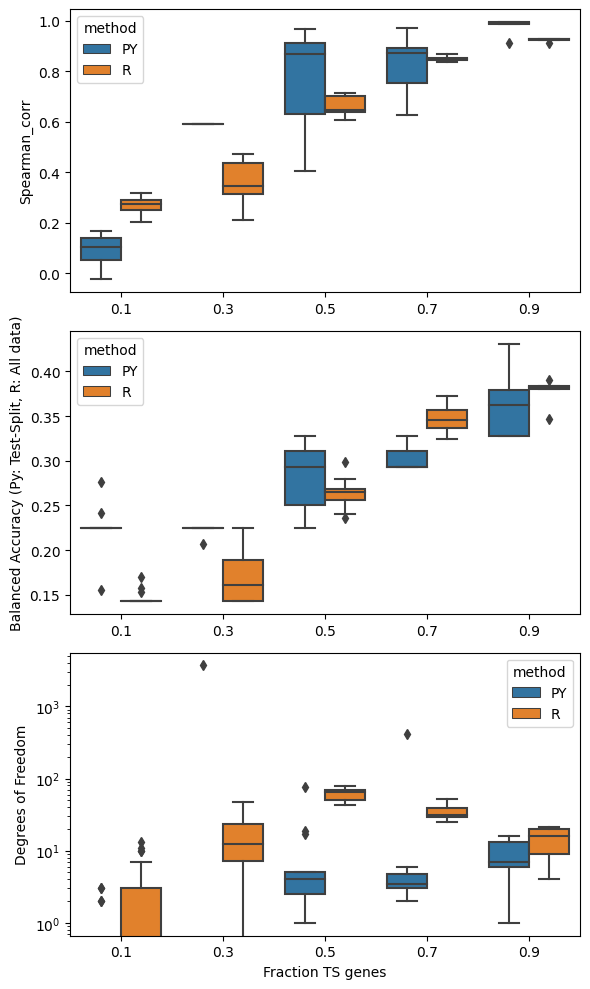

In [72]:
import seaborn as sns
import re

res_py = pd.read_csv("results_py_3.txt")
#res_py = pd.read_csv("results_py_3.txt")
res_r = pd.read_csv("results-R-2.txt")

# combine into one df
ts = res_py['file'].apply(lambda x: re.search(r'_TS(\d+\.\d+)', x).group(1))
ss = res_py['file'].apply(lambda x: re.search(r'_SS(\d+\.\d+)', x).group(1))
d = {"spearman_corr": np.concatenate([res_py["spearman_corr"].to_numpy(), res_r["cor_spearman"].to_numpy()]),
     "accuracy": np.concatenate([res_py["test_accuracy"].to_numpy(), res_r["bacc"].to_numpy()]),
     "bal_acc": np.concatenate([res_py["test_bal_acc"].to_numpy(), res_r["bacc"].to_numpy()]),
     "dof": np.concatenate([res_py["dof"].to_numpy(), res_r["dof"].to_numpy()]),
     "method": ["PY"] * res_py.shape[0] + ["R"] * res_r.shape[0],
     "ts": np.concatenate([ts, ts]),
     "ss": np.concatenate([ss, ss])}
data = pd.DataFrame.from_dict(d)

fig, ((ax1), (ax2), (ax3)) = plt.subplots(3, 1, figsize=(6, 10))

sns.boxplot(data=data, y="spearman_corr", x="ts", hue="method", ax=ax1)
ax1.set_xlabel("")
ax1.set_ylabel("Spearman_corr")
ax1.set_xticks(ax1.get_xticks(), ax1.get_xticklabels(), rotation=0, ha='center')

sns.boxplot(data=data, y="accuracy", x="ts", hue="method", ax=ax2)
ax2.set_xlabel("")
ax2.set_ylabel("Balanced Accuracy (Py: Test-Split, R: All data)")
ax2.set_xticks(ax2.get_xticks(), ax2.get_xticklabels(), rotation=0, ha='center')

sns.boxplot(data=data, y="dof", x="ts", hue="method", ax=ax3)
ax3.set_xlabel('Fraction TS genes')
ax3.set_ylabel("Degrees of Freedom")
ax3.set_xticks(ax3.get_xticks(), ax3.get_xticklabels(), rotation=0, ha='center')
ax3.set_yscale("log")
#ax3.set_ylim((0, 120))

# Display the plot
plt.tight_layout()
plt.show()

# Python Results
## Scores by TS and SS

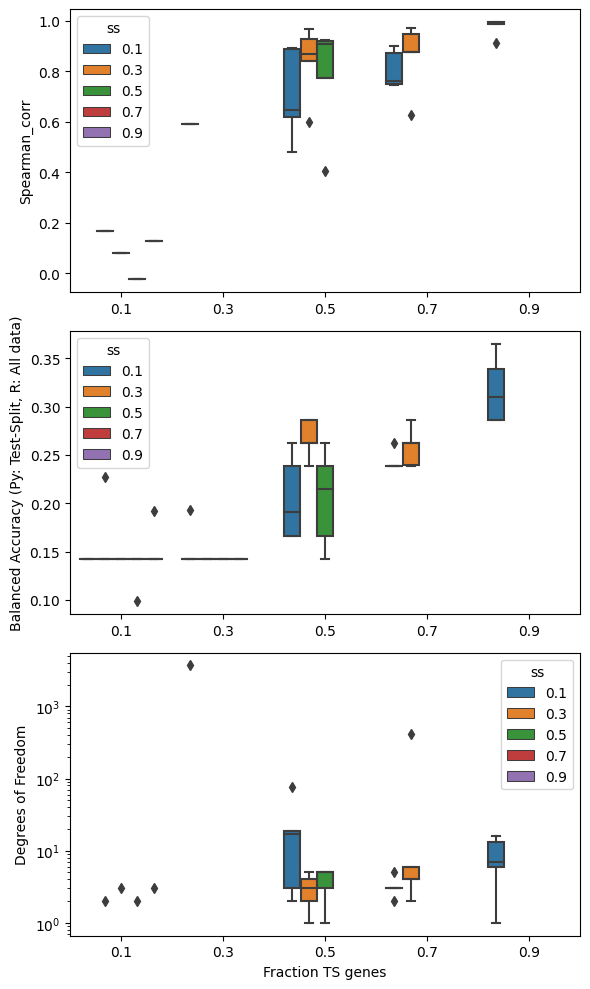

In [3]:
d = res_py.copy()
ts = d['file'].apply(lambda x: re.search(r'_TS(\d+\.\d+)', x).group(1))
ss = d['file'].apply(lambda x: re.search(r'_SS(\d+\.\d+)', x).group(1))
d["ts"] = ts
d["ss"] = ss

fig, ((ax1), (ax2), (ax3)) = plt.subplots(3, 1, figsize=(6, 10))

sns.boxplot(data=d, y="spearman_corr", x="ts", hue="ss", ax=ax1)
ax1.set_xlabel("")
ax1.set_ylabel("Spearman_corr")
ax1.set_xticks(ax1.get_xticks(), ax1.get_xticklabels(), rotation=0, ha='center')

sns.boxplot(data=d, y="test_bal_acc", x="ts", hue="ss", ax=ax2)
ax2.set_xlabel("")
ax2.set_ylabel("Balanced Accuracy (Py: Test-Split, R: All data)")
ax2.set_xticks(ax2.get_xticks(), ax2.get_xticklabels(), rotation=0, ha='center')

sns.boxplot(data=d, y="dof", x="ts", hue="ss", ax=ax3)
ax3.set_xlabel('Fraction TS genes')
ax3.set_ylabel("Degrees of Freedom")
ax3.set_xticks(ax3.get_xticks(), ax3.get_xticklabels(), rotation=0, ha='center')
ax3.set_yscale("log")
#ax3.set_ylim((0, 120))

# Display the plot
plt.tight_layout()
plt.show()

## Changing Elastic-Net Regularization

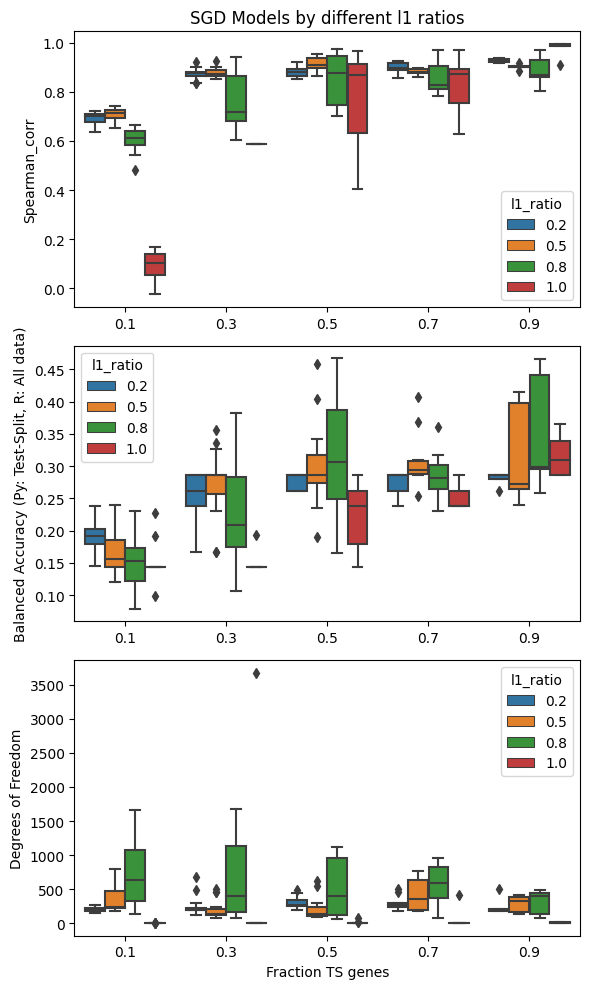

In [4]:
import seaborn as sns
import re

# read the results for all elastic ratios that were simulated
res_el02 = pd.read_csv("results_py_4-elastic-02.txt")
res_el05 = pd.read_csv("results_py_4-elastic05.txt")
res_el08 = pd.read_csv("results_py_4-elastic-08.txt")
res_el1 = pd.read_csv("results_py_3.txt")  # == l1_ratio=1

data = pd.concat([res_el02, res_el05, res_el08, res_el1])
data["l1_ratio"] = np.concatenate([["0.2"] * res_el02.shape[0],
                                   ["0.5"] * res_el02.shape[0],
                                   ["0.8"] * res_el02.shape[0],
                                   ["1.0"] * res_el02.shape[0],])

ts = res_el02['file'].apply(lambda x: re.search(r'_TS(\d+\.\d+)', x).group(1))
ss = res_el02['file'].apply(lambda x: re.search(r'_SS(\d+\.\d+)', x).group(1))
data["ts"] = np.concatenate([ts, ts, ts, ts])
data["ss"] = np.concatenate([ss, ss, ss, ss])

fig, ((ax1), (ax2), (ax3)) = plt.subplots(3, 1, figsize=(6, 10))

sns.boxplot(data=data, y="spearman_corr", x="ts", hue="l1_ratio", ax=ax1)
ax1.set_xlabel("")
ax1.set_ylabel("Spearman_corr")
ax1.set_xticks(ax1.get_xticks(), ax1.get_xticklabels(), rotation=0, ha='center')

sns.boxplot(data=data, y="test_bal_acc", x="ts", hue="l1_ratio", ax=ax2)
ax2.set_xlabel("")
ax2.set_ylabel("Balanced Accuracy (Py: Test-Split, R: All data)")
ax2.set_xticks(ax2.get_xticks(), ax2.get_xticklabels(), rotation=0, ha='center')

sns.boxplot(data=data, y="dof", x="ts", hue="l1_ratio", ax=ax3)
ax3.set_xlabel('Fraction TS genes')
ax3.set_ylabel("Degrees of Freedom")
ax3.set_xticks(ax3.get_xticks(), ax3.get_xticklabels(), rotation=0, ha='center')

ax1.set_title("SGD Models by different l1 ratios")

# Display the plot
plt.tight_layout()
plt.show()

# Gene Selection

In [49]:
genes_py = []
weights_py = []
genes_r = []

with open("genes_py_4-elastic-08.txt", "r") as f:
    for i, line in enumerate(f):
        if i % 2 == 1:
            gs = line.strip().split(", ")
            
            # if line is of length zero, split returns [""]
            if len(gs) == 1 and gs[0] == "":
                weights_py.append([])
            else:
                weights_py.append([float(w) for w in gs])
                
        if i % 2 == 0:
            gs = line.strip().split(", ")
            
            # if line is of length zero, split returns [""]
            if len(gs) == 1 and gs[0] == "":
                genes_py.append([])
            else:
                genes_py.append(gs)

#r_sep = ", "
r_sep = " "
with open("genes-R-2.txt", "r") as f:
    for line in f:
        gs = line.strip().split(r_sep)
        
        # if line is of length zero, split returns [""]
        if len(gs) == 1 and gs[0] == "":
            genes_r.append([])
        else:
            # FIX: Replace "." in gene names: 
            # This change was made in psupertime 
            # and causes issues when comparig
            gs = [g.replace(".", "-") for g in gs]
            genes_r.append(gs)


## Scoring of Sets

In [20]:
# dice index for two Set objects s1, s2
dice = lambda s1, s2:  ( 2 * len(s1.intersection(s2)) ) / ( len(s1) + len(s2) )

# jaccard score for two Set objects s1, s2
jaccard = lambda s1, s2: (len(s1.intersection(s2))) / (len(s1.union(s2)))

# overlap coefficient for Sets s1, s2
overlap = lambda s1, s2: (len(s1.intersection(s2)) / np.min([len(s1), len(s2)]))

## Consistancy of Gene Selection for different seeds

Calculates the Jaccard Score and Dice index for all pairs of experiments grouped by the TS value.

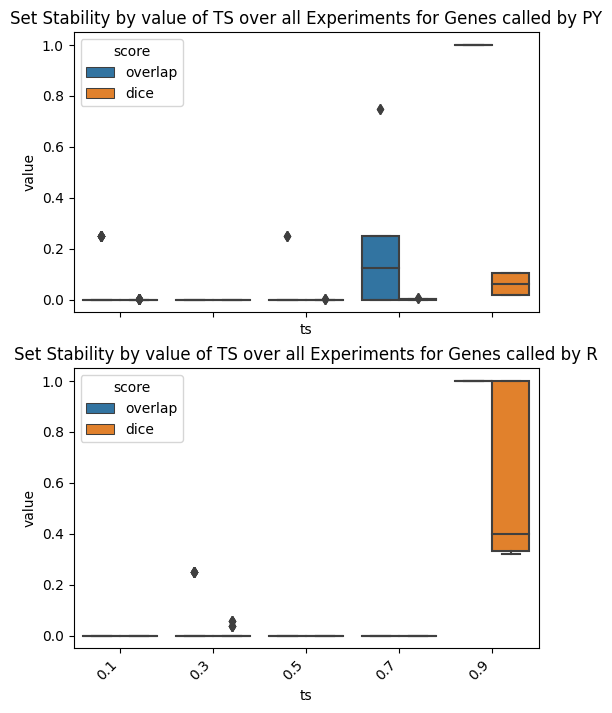

In [67]:
import seaborn as sns

n_seeds = 5

d = {"overlap": [], "dice": [], "ts": []}
for i in range(0, len(genes_py), n_seeds):
    for j in range(n_seeds):
        for k in range(j, n_seeds):
            s1 = set(genes_py[i + j])
            s1 = set(genes_py[i + k])
            
            if len(s1) > 0 and len(s2) > 0:
                d["overlap"] += [overlap(s1, s2)]
                d["dice"] += [dice(s1, s2)]
            else:
                d["overlap"] += [0]
                d["dice"] += [0]
                
            d["ts"] += [ts[i]]

data_py = pd.DataFrame.from_dict(d)


d = {"overlap": [], "dice": [], "ts": []}
for i in range(0, len(genes_r), n_seeds):
    for j in range(n_seeds):
        for k in range(j, n_seeds):
            s1 = set(genes_r[i + j])
            s1 = set(genes_r[i + k])
            
            if len(s1) > 0 and len(s2) > 0:
                d["overlap"] += [overlap(s1, s2)]
                d["dice"] += [dice(s1, s2)]
            else:
                d["overlap"] += [0]
                d["dice"] += [0]
                
            d["ts"] += [ts[i]]

data_r = pd.DataFrame.from_dict(d)

fig, ((ax1), (ax2)) = plt.subplots(2, 1, sharex=True, figsize=(6, 8))

_ = sns.boxplot(data=data_py.melt(id_vars="ts", value_vars=["overlap", "dice"], var_name="score"), x="ts", y="value", hue="score", ax=ax1)
_ = ax1.set_title("Set Stability by value of TS over all Experiments for Genes called by PY")

_ = sns.boxplot(data=data_r.melt(id_vars="ts",  value_vars=["overlap", "dice"], var_name="score"), x="ts", y="value", hue="score", ax=ax2)
_ = ax2.set_title("Set Stability by value of TS over all Experiments for Genes called by R")
_ = ax2.set_xticklabels([t.get_text() for t in ax2.get_xticklabels()], rotation=45, ha="right")

# Gene Selection R vs Python

In [14]:
from sklearn import metrics

gene_metrics_dict = {"overlap": [], "dice": [], "jaccard": [], "n_genes_py": [], "n_genes_r": []}
for i, (ex1, ex2) in enumerate(zip(genes_py, genes_r)):
    s1, s2 = set(ex1), set(ex2)

    if len(s1) > 0 and len(s2) > 0:
        # dice simmilarity coefficient
        dsc = dice(s1, s2)

        # jaccard score 
        jac = jaccard(s1, s2)

        # overlap coefficient
        ovl = len(s1.intersection(s2)) / np.min([len(s1), len(s2)])
    else:
        dsc, jac, ovl = 0, 0, 0

    gene_metrics_dict["n_genes_py"] += [len(s1)]
    gene_metrics_dict["n_genes_r"] += [len(s2)]
    gene_metrics_dict["overlap"] += [ovl]
    gene_metrics_dict["dice"] += [dsc]
    gene_metrics_dict["jaccard"] += [jac]

    #print("[%s]:" % i, "overlap:", ovl, "Dice:", dsc, "Jaccard:", jac

gene_metrics = pd.DataFrame.from_dict(gene_metrics_dict)

ts = res_py["file"].apply(lambda x: re.search(r'_TS(\d+\.\d+)', x).group(1))
ss = res_py["file"].apply(lambda x: re.search(r'_SS(\d+\.\d+)', x).group(1))
gene_metrics["ts"] = ts
gene_metrics["ss"] = ss

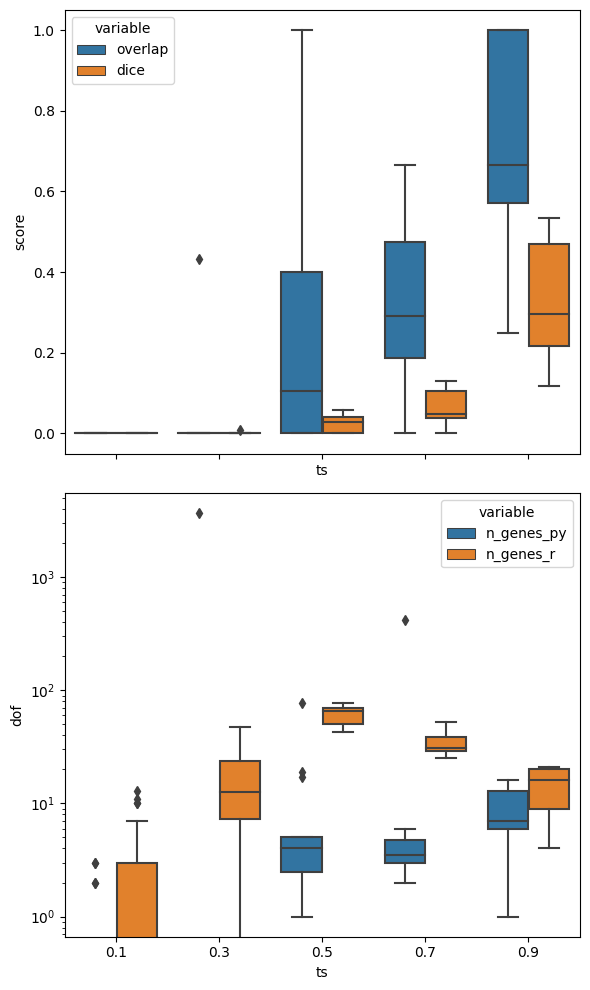

In [15]:
fig, ((ax1), (ax2)) = plt.subplots(2, 1, sharex=True, figsize=(6, 10))

_ = sns.boxplot(gene_metrics.melt(id_vars="ts", value_vars=["overlap", "dice"], value_name="score"), x="ts", y="score", hue="variable", ax=ax1)
_ = ax1.set_title("Set Stability Statistics between R and Py")
_ = sns.boxplot(gene_metrics.melt(id_vars="ts", value_vars=["n_genes_py", "n_genes_r"], value_name="dof"), x="ts", y="dof", hue="variable", ax=ax2)
_ = ax2.set_yscale("log")
fig.tight_layout()

## Closer look at simulations with little overlap

In [69]:
import scanpy as sc
import os

# the exact experiment of interest
idx = 74

# Union and intersect of the identified genes
union = list(set(genes_py[idx]).union(set(genes_r[idx])))
intersect = list(set(genes_py[idx]).intersection(set(genes_r[idx])))

data_dir = "/home/julian/Uni/MasterThesis/data/"
simdata = sc.read_h5ad(os.path.join(data_dir, res_py.iloc[idx].file))

counts = simdata[:,union].copy()

# Add a column indicating from which tool a gene was called
counts.var["group"] = None
counts.var.loc[genes_py[idx], "group"] = "PY"
counts.var.loc[genes_r[idx], "group"] = "R"
counts.var.loc[intersect, "group"] = "PY,R"

file = res_py.iloc[idx]["file"]
print("Sim='%s'" % file, "Idx=%s" % idx, "TS=%s" % ts[idx], "SS=%s" % ss[idx])
print("\nPY:")
print(res_py.iloc[idx][["dof", "train_bal_acc", "test_bal_acc", "spearman_corr"]])
print("\nR:")
print(res_r.iloc[idx][["dof", "bacc", "cor_spearman"]])

Sim='simdata_v2_TS0.9_SS0.1.h5ad' Idx=74 TS=0.9 SS=0.1

PY:
dof                    74
train_bal_acc    0.370067
test_bal_acc     0.442177
spearman_corr    0.969235
Name: 74, dtype: object

R:
dof                    4
bacc             0.34644
cor_spearman    0.912288
Name: 74, dtype: object


/home/julian/.local/share/virtualenvs/code-tW9RC7Ez/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


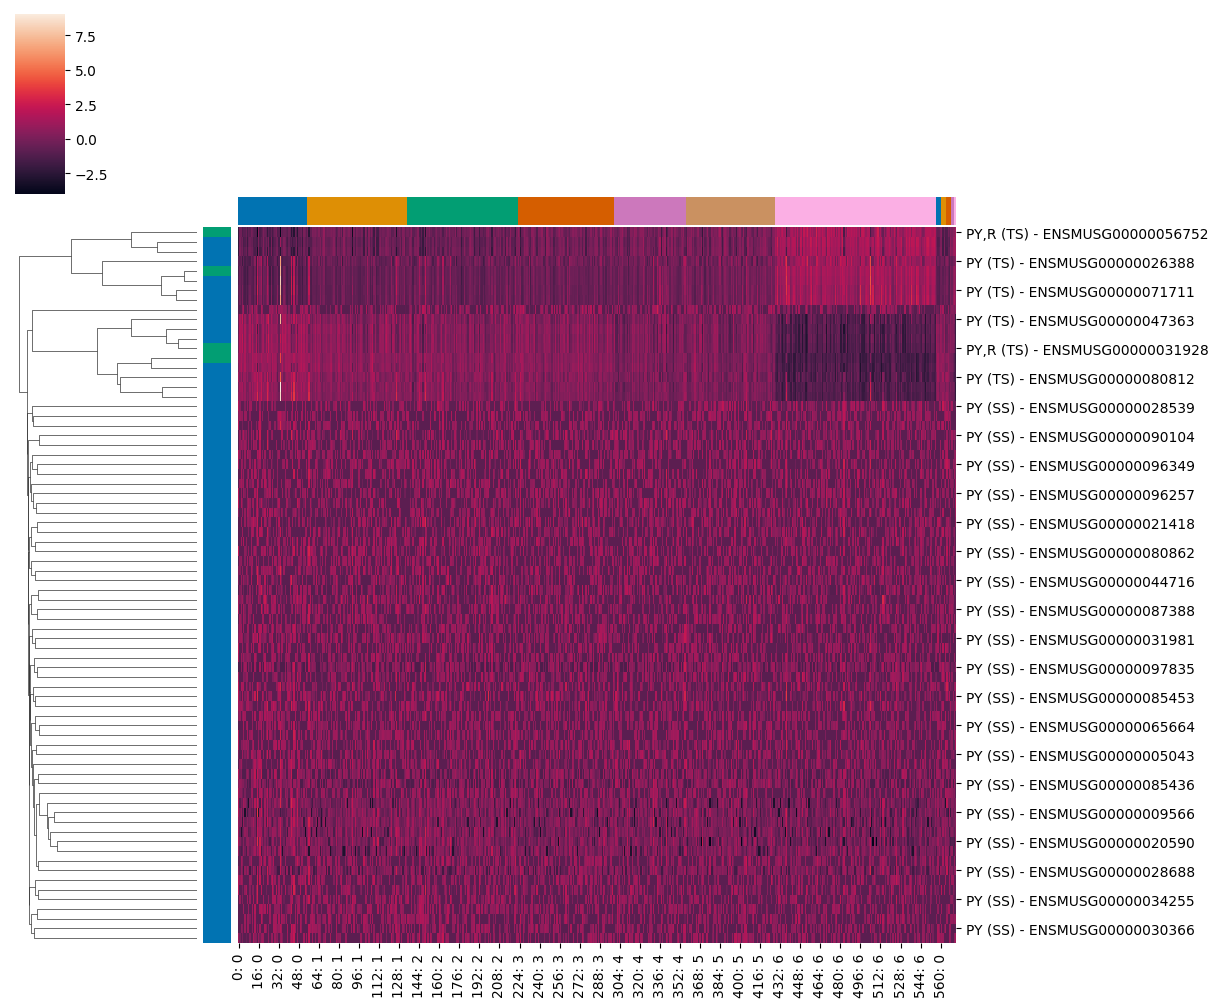

In [70]:
from scipy.spatial import distance
from scipy.cluster import hierarchy
import seaborn as sns

col_labels = counts.obs.Ordinal_Time_Labels.to_numpy()
cmap = sns.color_palette("colorblind", max(3, len(np.unique(col_labels))))

col_colors = [cmap[e] for e in col_labels]
row_colors = [cmap[0 if e == "PY" else 1 if e == "R" else 2] for e in counts.var["group"].to_numpy()]

g = sns.clustermap(counts.X.T, col_cluster=False, col_colors=col_colors, row_colors=row_colors)
ordering = g.dendrogram_row.reordered_ind

ylabels = []
# iterate only over the ticks that are plotted!
for text in g.ax_heatmap.get_yticklabels():
    # the Text() object contains the row index as a string
    i = int(text.get_text())
    group = counts.var.iloc[i].group
    setting = counts.var.iloc[i].Setting
    gene_name = counts.var.iloc[i].name
    label = "%s (%s) - %s" % (group, setting, gene_name)
    ylabels.append(label)
g.ax_heatmap.set_yticklabels(ylabels, rotation=0)

xlabels = []
# iterate only over the ticks that are plotted!
for text in g.ax_heatmap.get_xticklabels():
    # the Text() object contains the row index as a string
    i = int(text.get_text())
    time_label = counts.obs.iloc[i].Ordinal_Time_Labels
    label = "%s: %s" % (i, time_label)
    xlabels.append(label)
g.ax_heatmap.set_xticklabels(xlabels, rotation=90)

# Display the plot
plt.show()

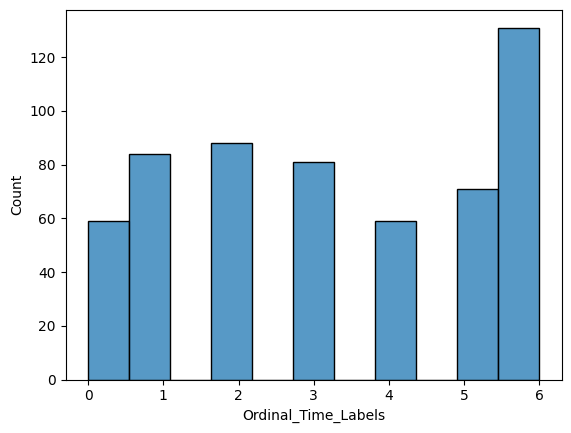

In [11]:
h = sns.histplot(simdata.obs.Ordinal_Time_Labels)

## Inspect clustered gene expression

         Falling back to preprocessing with `sc.pp.pca` and default params.


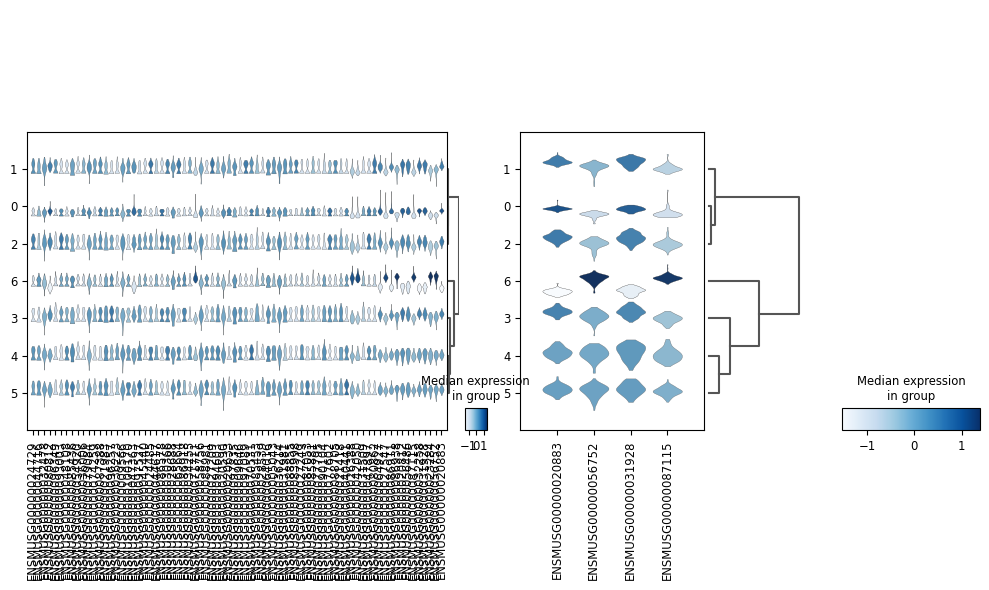

In [12]:
import scanpy as sc

fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

simdata.obs["categorical_labels"] = simdata.obs.Ordinal_Time_Labels.astype("category")
markers = genes_py[idx]
_ = sc.pl.stacked_violin(simdata, markers, show=False, groupby="categorical_labels", dendrogram=True, ax=ax1)

markers = genes_r[idx]
_ = sc.pl.stacked_violin(simdata, markers, show=False, groupby="categorical_labels", dendrogram=True, ax=ax2)

plt.tight_layout()
plt.show()